In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

In [6]:
# Read the data
ames = pd.read_csv(r'c:\Users\elect\OneDrive\Desktop\AmesHousing.csv')

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:, good_cols]

# Drop other NAs
ames = ames.dropna()

In [7]:
# Linear Regression
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [8]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([-9.01503105e+18, -1.48024031e+20, -4.71107307e+18, -2.18819012e+19,
       -2.15537639e+18])

In [9]:
# Ridge Regression
ridge = Ridge(alpha=1)

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

r_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", ridge)]
)

In [10]:
cross_val_score(r_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([0.89815807, 0.91744024, 0.79493606, 0.78522563, 0.91389818])

 Ridge regression provides significantly smaller and more consistent coefficients compared to linear regression. Many of the ridge coefficients are close to or exactly zero, reflecting ridge’s ability to shrink less important predictors. This contrasts with the larger, more varied coefficients of the linear regression model."

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted_pipeline = lr_pipeline_1.fit(X_train, y_train)
r_fitted_pipeline = r_pipeline_1.fit(X_train, y_train)

lr_coef = lr_fitted_pipeline.named_steps["linear_regression"].coef_
r_coef = r_fitted_pipeline.named_steps["ridge_regression"].coef_

coefs = pd.DataFrame({"Linear Regression": lr_coef, "Ridge Regression": r_coef})

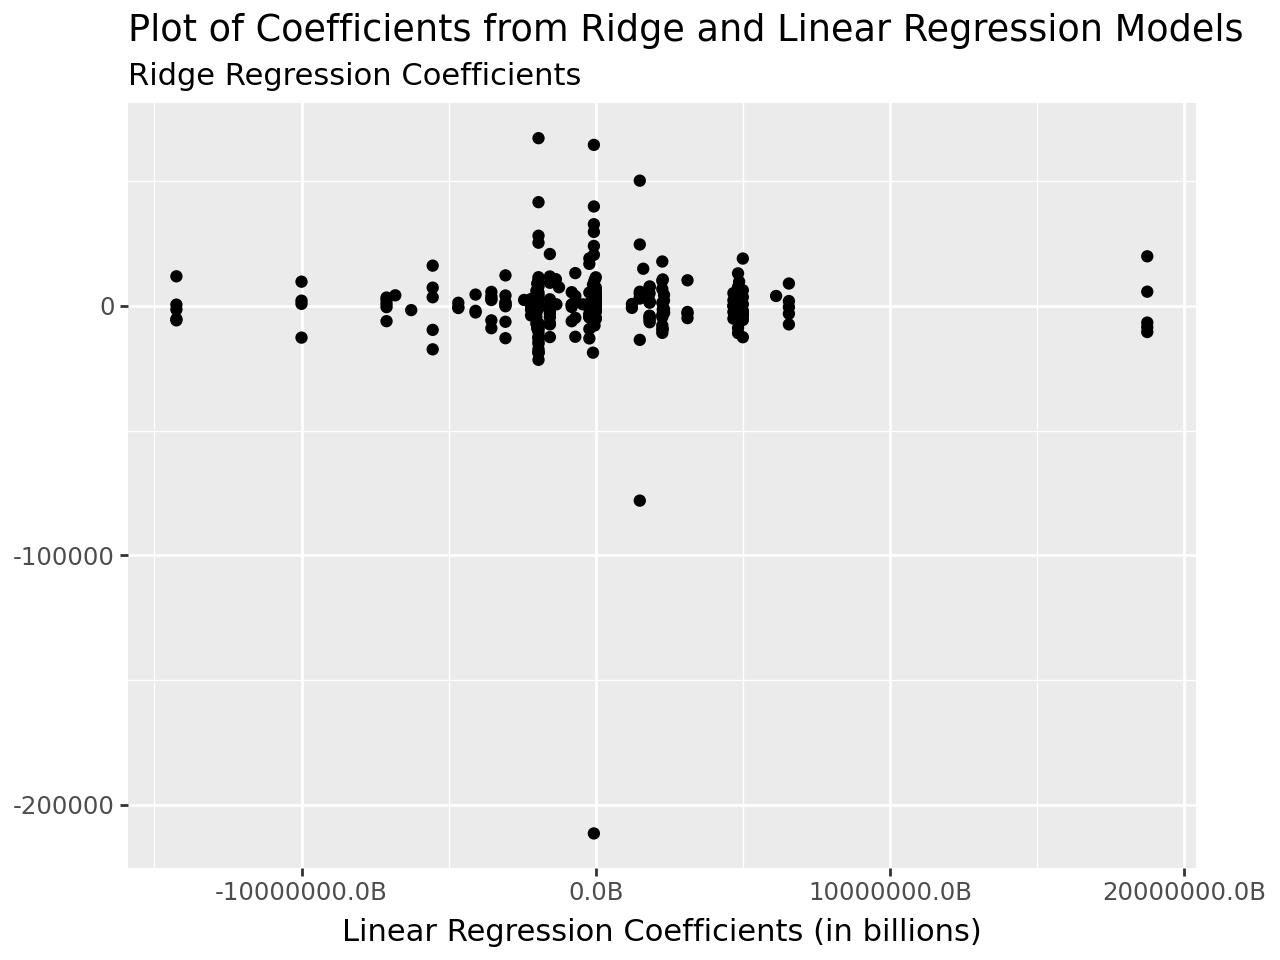

In [13]:
from plotnine import ggplot, aes, labs, geom_point, scale_x_continuous

(ggplot(coefs, aes(x="Linear Regression", y="Ridge Regression")) +
    geom_point() +
    scale_x_continuous(
        labels=lambda l: ["{:.1f}B".format(x / 1e9) for x in l]
    ) +
    labs(
        x="Linear Regression Coefficients (in billions)",
        y="",
        subtitle="Ridge Regression Coefficients",
        title="Plot of Coefficients from Ridge and Linear Regression Models"
    ))

In [14]:
alphas = {"ridge_regression__alpha": [.001, .01, .1, 1, 10]}

ridge = Ridge()

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

r_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", ridge)]
)

In [15]:
gscv = GridSearchCV(r_pipeline_1, alphas, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X, y)

In [16]:
gscv_fitted.cv_results_["mean_test_score"]

array([0.85392021, 0.85418638, 0.85630206, 0.86193163, 0.86427221])

In [17]:
alphas = {"lasso_regression__alpha": [.001, .01, .1, 1, 10]}

lasso = Lasso()

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", lasso)]
)

In [18]:
gscv = GridSearchCV(lasso_pipeline_1, alphas, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X, y)

c:\Users\elect\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
c:\Users\elect\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
c:\Users\elect\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+11, tolerance: 1.463e+09
c:\Users\elect\anaconda3\Lib\site-packages\sklearn\linear_model\_coordina

In [19]:
gscv_fitted.cv_results_["mean_test_score"]

array([0.85549892, 0.85560578, 0.85661828, 0.85715222, 0.86063224])

In [20]:
lasso = Lasso(alpha = 10)

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", lasso)]
)

lasso_fitted_pipeline = lasso_pipeline_1.fit(X_train, y_train)

lasso_coef = lasso_fitted_pipeline.named_steps["lasso_regression"].coef_

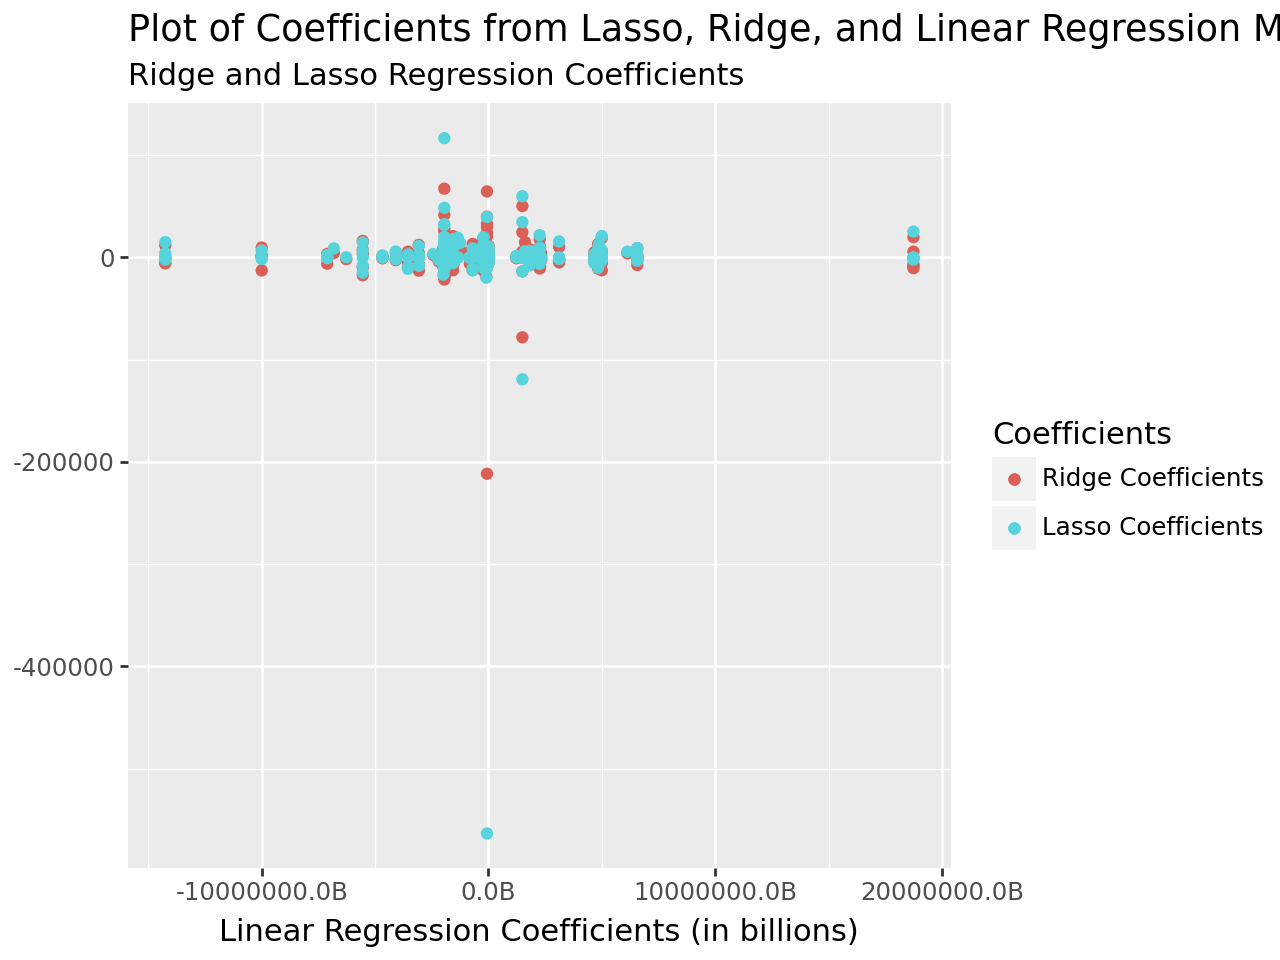

In [22]:
(ggplot(coefs, aes(x="Linear Regression")) +
    geom_point(aes(y="Ridge Regression", color='"Ridge Coefficients"')) +
    geom_point(aes(y="Lasso Regression", color='"Lasso Coefficients"')) +
    scale_x_continuous(
        labels=lambda l: ["{:.1f}B".format(x / 1e9) for x in l]
    ) +
    labs(
        x="Linear Regression Coefficients (in billions)",
        y="",
        subtitle="Ridge and Lasso Regression Coefficients",
        title="Plot of Coefficients from Lasso, Ridge, and Linear Regression Models",
        color="Coefficients"
    ))

The graph shows that, on average, the lasso coefficients are closer to zero than the ridge coefficients, with only a few exceptions. This illustrates lasso’s tendency to shrink less important variables more aggressively, while ridge maintains coefficients across all predictors.

In [23]:
alphas = {"elastic_net__alpha": [.001, .01, .1, 1, 10], "elastic_net__l1_ratio": [.001, .01, .1, 1]}

en = ElasticNet()

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

elastic_net_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", en)]
)

In [24]:

gscv = GridSearchCV(elastic_net_pipeline_1, alphas, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X, y)

c:\Users\elect\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.516e+11, tolerance: 1.348e+09
c:\Users\elect\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.310e+11, tolerance: 1.474e+09
c:\Users\elect\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.147e+11, tolerance: 1.463e+09
c:\Users\elect\anaconda3\Lib\site-packages\sklearn\linear_model\_coordina

In [25]:
gscv_fitted.cv_results_["mean_test_score"]
gscv_fitted.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000217365A8890>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021736588620>)])),
                ('elastic_net', ElasticNet(alpha=0.01, l1_ratio=0.1))])

In [26]:
en = ElasticNet(alpha=.01, l1_ratio=.1)

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

elastic_net_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_net", en)]
)

In [27]:

elastic_net_fitted_pipeline = elastic_net_pipeline_1.fit(X_train, y_train)

elastic_net_coefs = elastic_net_fitted_pipeline.named_steps["elastic_net"].coef_

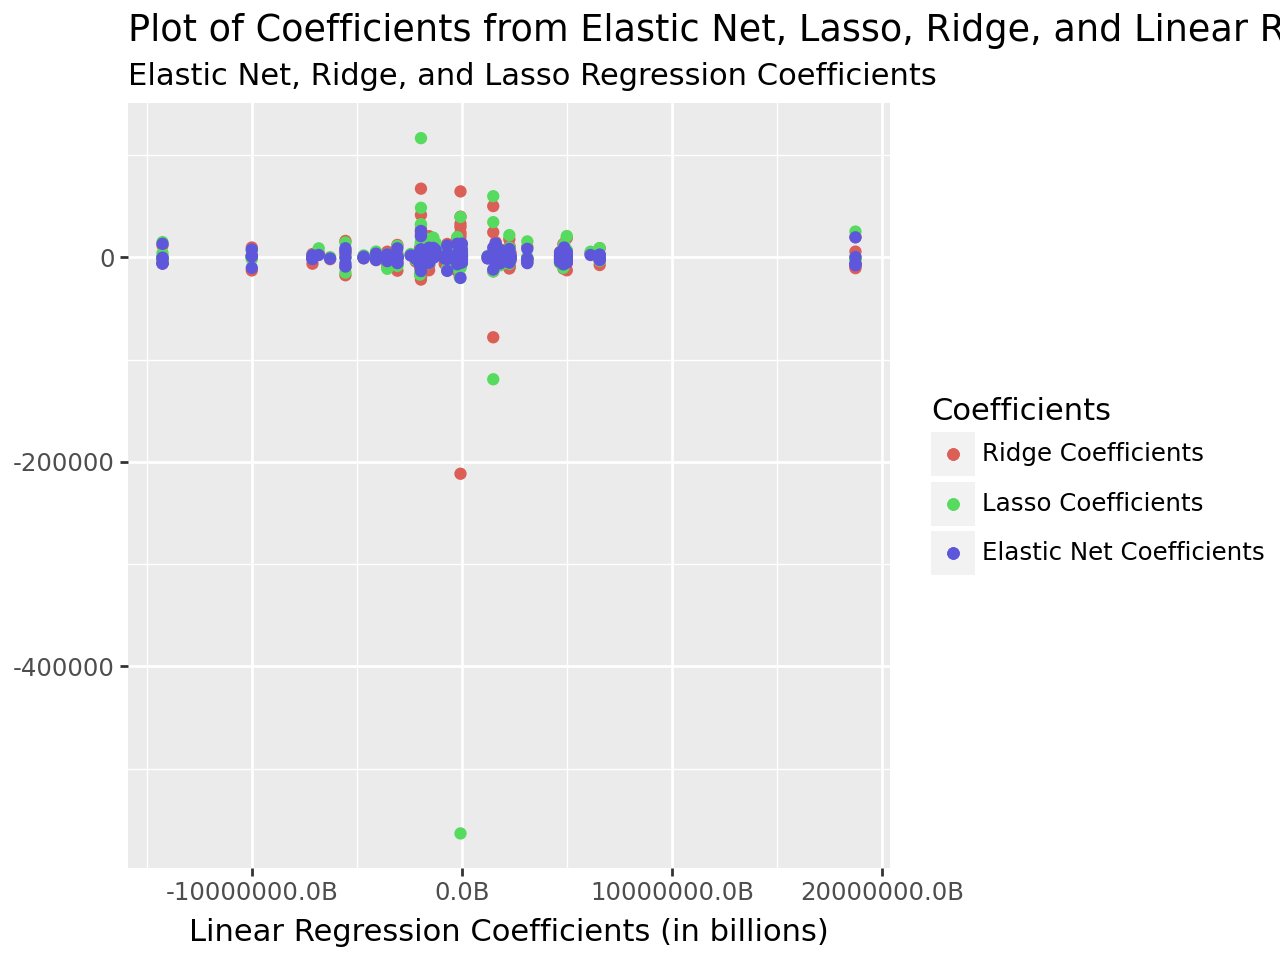

In [30]:
(ggplot(coefs, aes(x="Linear Regression")) +
    geom_point(aes(y="Ridge Regression", color='"Ridge Coefficients"')) +
    geom_point(aes(y="Lasso Regression", color='"Lasso Coefficients"')) +
    geom_point(aes(y="Elastic Net Regression", color='"Elastic Net Coefficients"')) +
    scale_x_continuous(
        labels=lambda l: ["{:.1f}B".format(x / 1e9) for x in l]
    ) +
    labs(
        x="Linear Regression Coefficients (in billions)",
        y="",
        subtitle="Elastic Net, Ridge, and Lasso Regression Coefficients",
        title="Plot of Coefficients from Elastic Net, Lasso, Ridge, and Linear Regression Models",
        color="Coefficients"
    ))

The graph shows that elastic net regression offers a balanced improvement over both lasso and ridge, with more stable coefficients than linear regression. This suggests that elastic net effectively combines the strengths of ridge and lasso for better generalization across variables.